# Purpose
1. 請為客戶進行貼標，並依其特性進行命名，以幫助行銷部門推出新產品和制定行銷方式。
2. 請先進行降維後再分群(依你的判斷選擇降維和分群的方法)

In [70]:
import pandas as pd

# 1. import data

In [71]:
df = pd.read_csv('segmentation_data.csv')
df.head()

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,100000001,0,0,67,2,124670,1,2
1,100000002,1,1,22,1,150773,1,2
2,100000003,0,0,49,1,89210,0,0
3,100000004,0,0,45,1,171565,1,1
4,100000005,0,0,53,1,149031,1,1


In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   ID               2000 non-null   int64
 1   Sex              2000 non-null   int64
 2   Marital status   2000 non-null   int64
 3   Age              2000 non-null   int64
 4   Education        2000 non-null   int64
 5   Income           2000 non-null   int64
 6   Occupation       2000 non-null   int64
 7   Settlement size  2000 non-null   int64
dtypes: int64(8)
memory usage: 125.1 KB


#### ID：顯示客戶的唯一標識。

#### Sex：
0：男性        
1：女性        

#### Marital status：客戶的婚姻狀況。
0：單人        
1：非單身（離婚/分居/已婚/喪偶）        

#### Age：客戶的年齡（以年為單位），計算方法為當年減去創建數據集時客戶的出生年份
18 最小值（數據集中觀察到的最低年齡）        
76 最大值（數據集中觀察到的最高年齡）        

#### Education：客戶的教育水準。
0：其他/未知        
1：高中        
2：大學        
3：研究生院        

#### Income：客戶以美元自我報告的年收入。
35832 最小值（數據集中觀察到的最低收入）        
309364 最大值（數據集中觀察到的最高收入）        

#### Occupation ：客戶的職業類別。
0：失業 / unskilled        
1：skilled employee / official        
2：management / self-employed / highly qualified employee / officer        

#### Settlement size：客戶居住城市的規模。
0：小城市        
1：中等城市        
2：大城市        

In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN
from scipy.cluster.hierarchy import linkage, dendrogram, cut_tree
from sklearn.metrics import silhouette_score
from sklearn.manifold import MDS

                 ID          Sex  Marital status          Age   Education  \
count  2.000000e+03  2000.000000     2000.000000  2000.000000  2000.00000   
mean   1.000010e+08     0.457000        0.496500    35.909000     1.03800   
std    5.774946e+02     0.498272        0.500113    11.719402     0.59978   
min    1.000000e+08     0.000000        0.000000    18.000000     0.00000   
25%    1.000005e+08     0.000000        0.000000    27.000000     1.00000   
50%    1.000010e+08     0.000000        0.000000    33.000000     1.00000   
75%    1.000015e+08     1.000000        1.000000    42.000000     1.00000   
max    1.000020e+08     1.000000        1.000000    76.000000     3.00000   

              Income   Occupation  Settlement size  
count    2000.000000  2000.000000      2000.000000  
mean   120954.419000     0.810500         0.739000  
std     38108.824679     0.638587         0.812533  
min     35832.000000     0.000000         0.000000  
25%     97663.250000     0.000000        

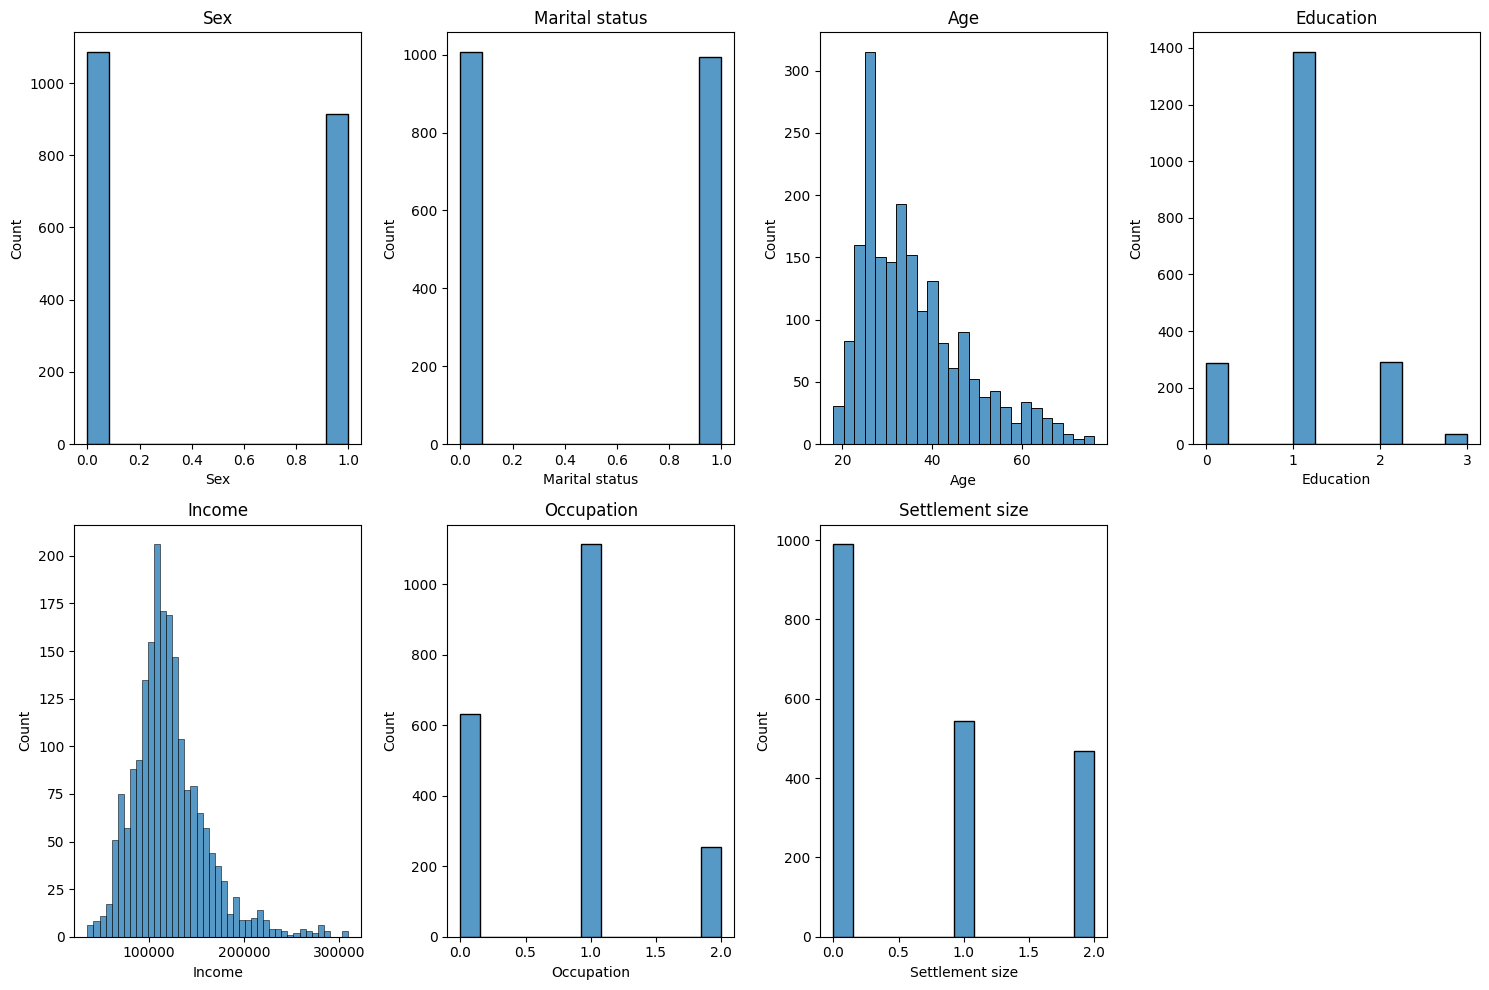

In [74]:
print(df.describe())

# 查看各變數的分布
plt.figure(figsize=(15,10))
for i, col in enumerate(df.columns[1:], 1):
    plt.subplot(2,4,i)
    sns.histplot(df[col])
    plt.title(col)
plt.tight_layout()
plt.show()


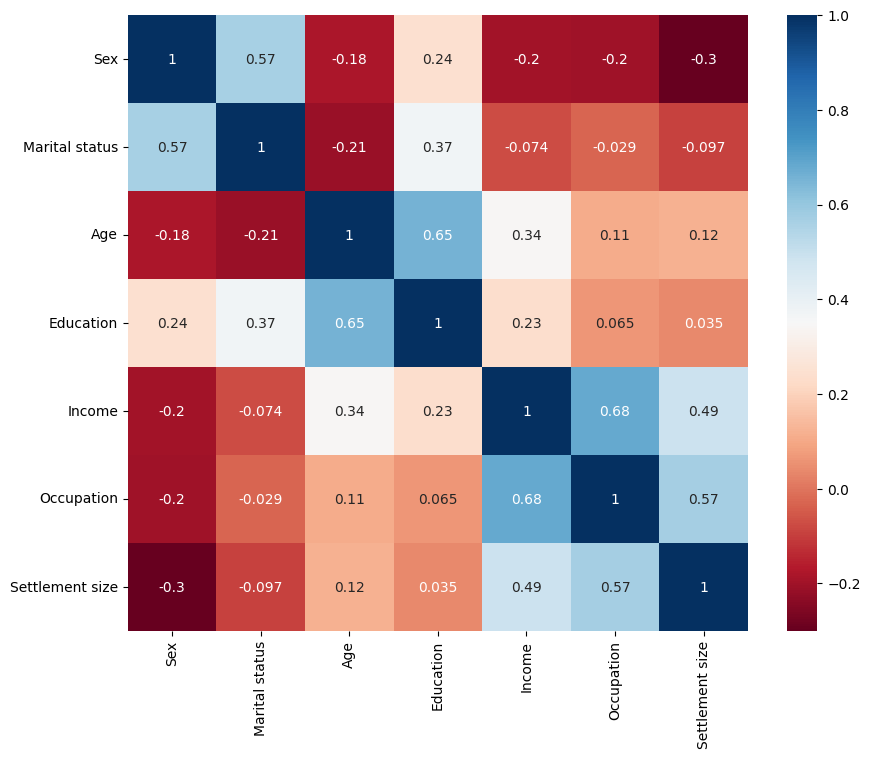

In [75]:
# 相關性分析
plt.figure(figsize=(10,8))
sns.heatmap(df.iloc[:,1:].corr(), annot=True, cmap='RdBu')
plt.show()

各主成分解釋變異量比例:
[0.35696328 0.26250923 0.18821114 0.0755775  0.05716512 0.03954794
 0.02002579]


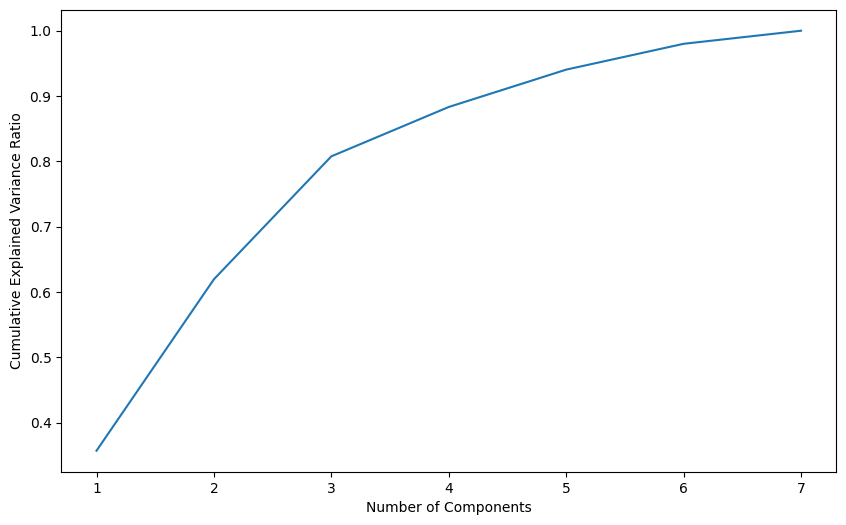

In [76]:
# 準備資料進行PCA (排除ID欄位)
features = df.drop('ID', axis=1)

# 標準化
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# PCA
pca = PCA()
pca_result = pca.fit_transform(features_scaled)

# 檢視解釋變異量
print("各主成分解釋變異量比例:")
print(pca.explained_variance_ratio_)

# 繪圖
plt.figure(figsize=(10,6))
plt.plot(range(1, len(pca.explained_variance_ratio_)+1), 
         np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.show()

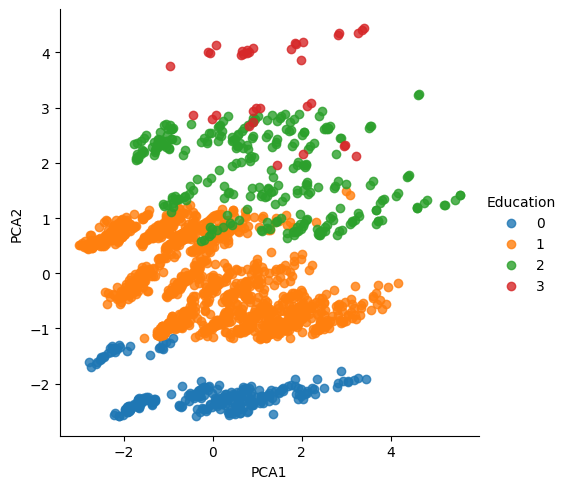

In [77]:
pca_2d = PCA(n_components=2, random_state=123)
pca_trans = pca_2d.fit_transform(features_scaled)

factor_tb = pd.DataFrame(pca_trans, columns=['PCA1', 'PCA2'])
df_factor_tb = pd.concat([df.reset_index(drop=True), factor_tb], axis=1)
sns.lmplot(data=df_factor_tb, x='PCA1', y='PCA2', hue='Education', 
                   fit_reg=False, legend=True, facet_kws={'legend_out': True})

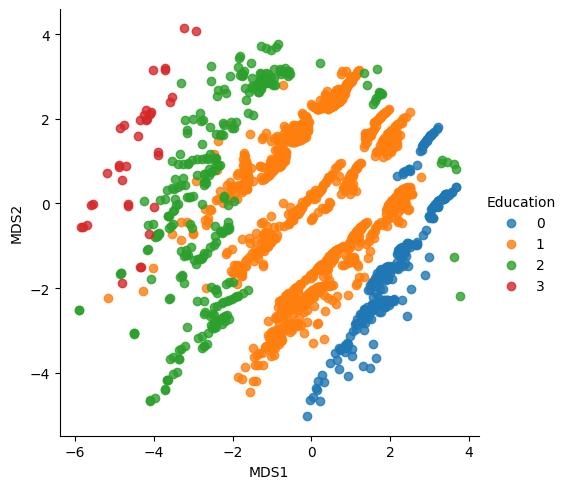

In [78]:
embedding = MDS(n_components=2, random_state=123) # 2維方便視覺化
mds_trans = embedding.fit_transform(features_scaled)

mds_tb = pd.DataFrame(mds_trans, columns=['MDS1', 'MDS2'])
df_mds_tb = pd.concat([df.reset_index(drop=True), mds_tb], axis=1)

sns.lmplot(data=df_mds_tb, x='MDS1', y='MDS2', hue='Education', 
                   fit_reg=False, legend=True, facet_kws={'legend_out': True})

### PCA看起來分得比較好，用PCA

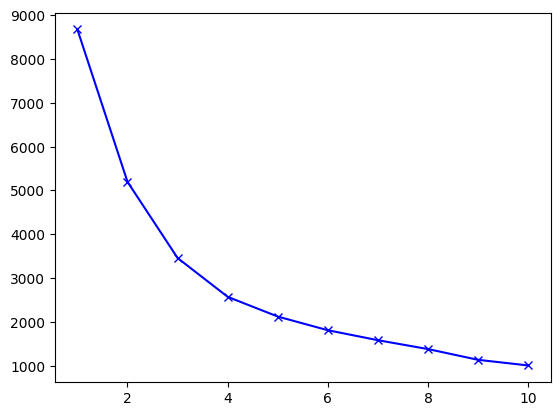

In [79]:
# Elbow curve method to find the ideal number of clusters.
inertias = []
K = range(1,11)
for k in K:
    kmeans = KMeans(n_clusters=k, max_iter=150, random_state=42)
    kmeans.fit(pca_trans)
    inertias.append(kmeans.inertia_)

plt.plot(K, inertias, 'bx-')

In [80]:
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

for num_clusters in range_n_clusters:
    
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50,random_state= 100)
    kmeans.fit(pca_trans)
    
    cluster_labels = kmeans.labels_
    
    # silhouette score
    silhouette_avg = silhouette_score(pca_trans, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))

For n_clusters=2, the silhouette score is 0.39455178857950773
For n_clusters=3, the silhouette score is 0.432036271194525
For n_clusters=4, the silhouette score is 0.4148255711906204
For n_clusters=5, the silhouette score is 0.3613018534425702
For n_clusters=6, the silhouette score is 0.3609180033459296
For n_clusters=7, the silhouette score is 0.3875398430777464
For n_clusters=8, the silhouette score is 0.413443247410435


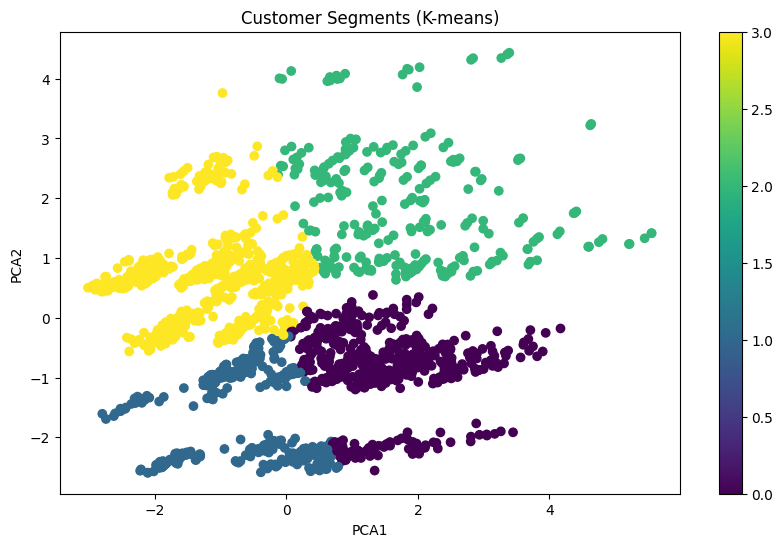

In [81]:
# K-means ( k=4 時較明顯)
kmeans = KMeans(n_clusters=4, random_state=111)
kmeans_clusters = kmeans.fit_predict(pca_trans)

plt.figure(figsize=(10,6))
scatter = plt.scatter(pca_trans[:, 0], pca_trans[:, 1], 
                     c=kmeans_clusters, cmap='viridis')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.title('Customer Segments (K-means)')
plt.colorbar(scatter)
plt.show()

In [85]:
df['Cluster'] = kmeans_clusters  # K-means的結果
cluster_means = df.groupby('Cluster').mean()
print(cluster_means)


                   ID       Sex  Marital status        Age  Education  \
Cluster                                                                 
0        1.000008e+08  0.009560        0.173996  37.720841   0.858509   
1        1.000010e+08  0.093151        0.027397  31.547945   0.416438   
2        1.000008e+08  0.533582        0.731343  52.563433   2.007463   
3        1.000012e+08  0.867299        0.824645  31.383886   1.110190   

                Income  Occupation  Settlement size  
Cluster                                              
0        143454.860421    1.273423         1.430210  
1         98638.550685    0.430137         0.361644  
2        164420.186567    1.283582         1.246269  
3        102860.503555    0.537915         0.312796  


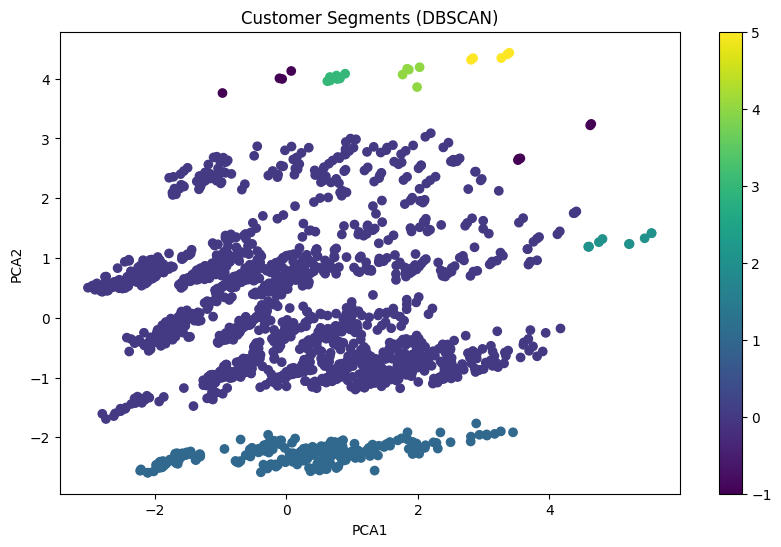

In [83]:
# DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_clusters = dbscan.fit_predict(pca_trans)

plt.figure(figsize=(10,6))
scatter = plt.scatter(pca_trans[:, 0], pca_trans[:, 1], 
                     c=dbscan_clusters, cmap='viridis')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.title('Customer Segments (DBSCAN)')
plt.colorbar(scatter)
plt.show()


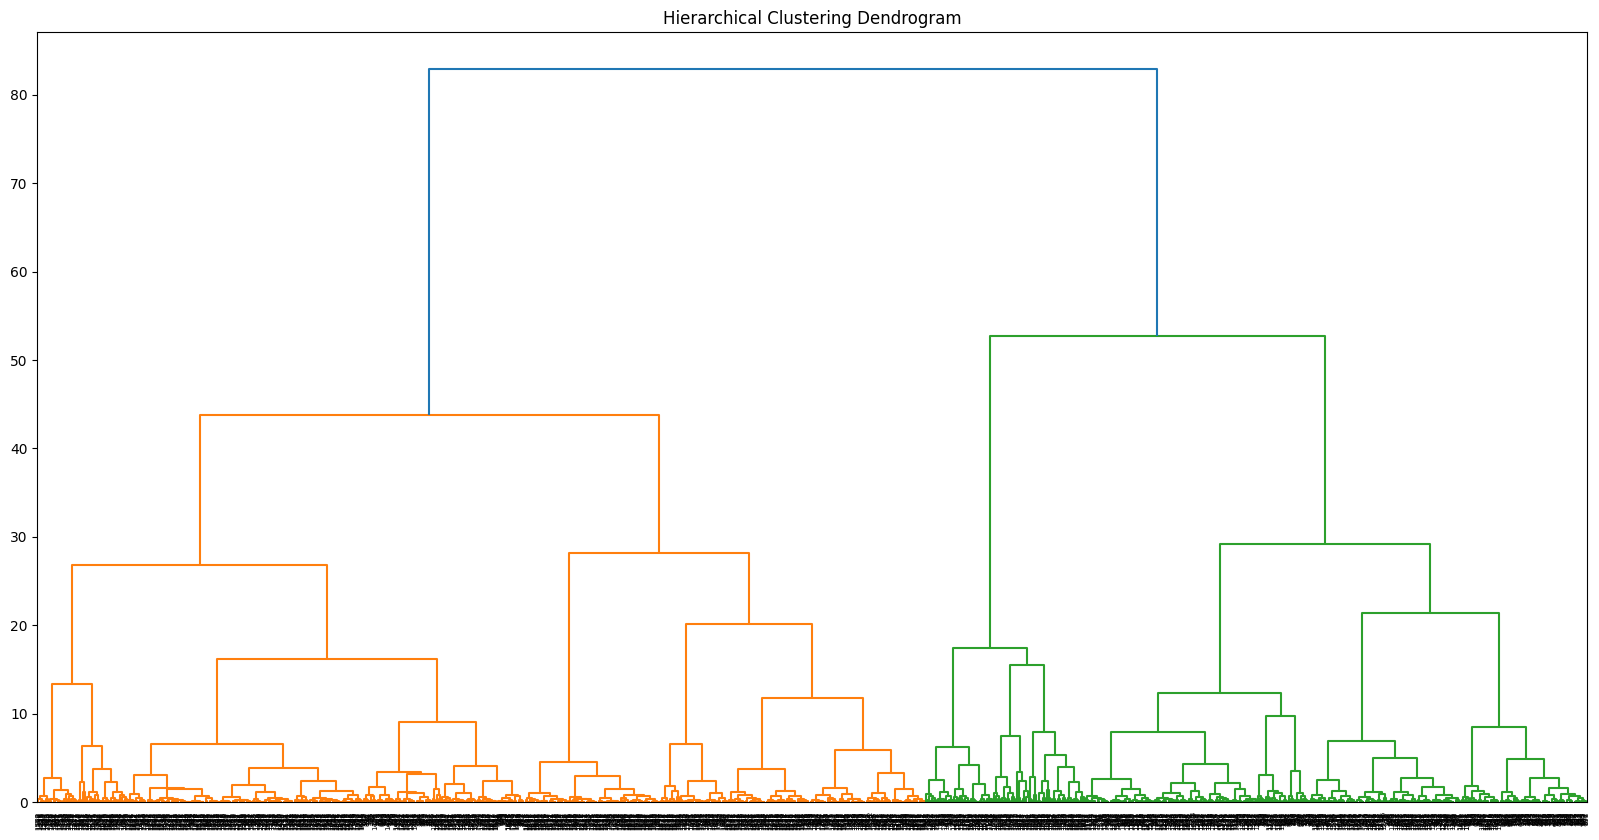

In [84]:
# Hierarchical Clustering
linkage_matrix = linkage(pca_trans, method='ward',metric='euclidean')

plt.figure(figsize=(20,10))
dendrogram(linkage_matrix)
plt.title('Hierarchical Clustering Dendrogram')
plt.show()

# 分群建議
#### 1.
- 25-35歲
- 高教育程度
- 中高收入
- 大城市

#### 2.
- 40-55歲
- 已婚
- 穩定收入
- 中城市

#### 3.
- 20-30歲
- 較低收入
- 教育程度中等
- 小城市

#### 4.
- 45-65歲
- 高收入
- 高教育程度
- 大城市
